# Registered Users' Analysis #

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']= 10,6

In [96]:
path =r"C:\Users\GAURI TOSHNIWAL\Documents\DARPG Hackathon\Registered_Users.csv"
df = pd.read_csv(path,encoding = 'unicode_escape',low_memory=False)

In [97]:
df.shape

(618968, 8)

In [98]:
df.set_index('User Code',inplace=True)

In [99]:
df.shape

(618968, 7)

In [100]:
df.head()

,Country,State Name,District Name,Pin,Gender,Date of Registration,Time of Registration
User Code,,,,,,,
1,India,Delhi,South West Delhi,110022,M,03/11/2017,18:15:15
2,India,Uttarakhand,Dehradun,249201,T,03/11/2017,21:01:32
3,India,Delhi,North Delhi,247667,M,03/11/2017,21:55:22
4,India,Haryana,Hisar,125001,M,03/11/2017,22:20:35
5,India,Delhi,North Delhi,248001,M,04/11/2017,13:31:47


In [101]:
df.tail()

,Country,State Name,District Name,Pin,Gender,Date of Registration,Time of Registration
User Code,,,,,,,
629937,India,Andhra Pradesh,Visakhapatnam,530018,F,24/10/2019,16:54:24
629938,India,Delhi,New Delhi,110092,m,24/10/2019,16:59:51
629939,India,Jharkhand,Gumla,835207,M,24/10/2019,17:00:40
629940,India,Maharashtra,Mumbai City,400018,f,24/10/2019,17:01:30
629941,India,West Bengal,North 24 Parganas,700056,F,24/10/2019,17:05:58


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618968 entries, 1 to 629941
Data columns (total 7 columns):
Country                 618968 non-null object
State Name              618599 non-null object
District Name           618803 non-null object
Pin                     591863 non-null object
Gender                  618660 non-null object
Date of Registration    618968 non-null object
Time of Registration    618968 non-null object
dtypes: object(7)
memory usage: 37.8+ MB


## Gender Distribution:##

In [103]:
df['Gender'].value_counts()

M    483814
F     66037
m     63803
f      4976
t        27
T         3
Name: Gender, dtype: int64

In [104]:
df['Gender'].replace(to_replace ="m", value ="M",inplace=True) 

In [105]:
df['Gender'].replace(to_replace ="f", value ="F",inplace=True) 

In [106]:
df['Gender'].replace(to_replace ="t", value ="T",inplace=True)

In [107]:
h = df['Gender'].value_counts()
h

M    547617
F     71013
T        30
Name: Gender, dtype: int64

<BarContainer object of 3 artists>

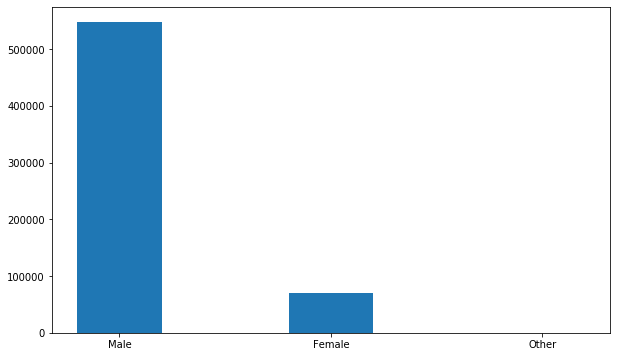

In [119]:
plt.bar(['Male','Female','Other'],h, width=0.4, align='center', data= df)

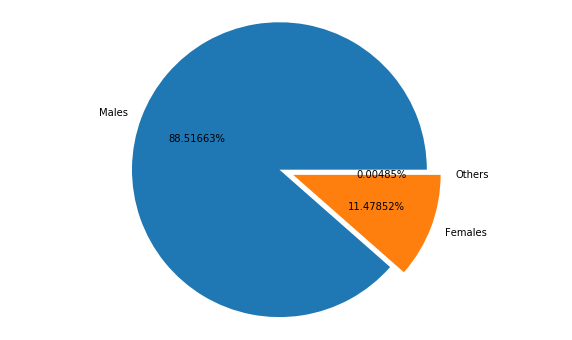

In [109]:
labels = ['Males', 'Females', 'Others']
sizes = [547617, 71013, 30]
explode = (0.1, 0, 0)
fig1,ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.5f%%')
ax1.axis('equal')
plt.show()

#### Out of 6,18,660 users:<br><br> 5,47,617 are male<br><br>71,013 are female<br><br>and 30 others

## Users distributed over different Countries ##

In [110]:
country = df['Country'].value_counts()

In [111]:
df1 = country.to_frame()

In [112]:
df1.head(10)

,Country
India,615583
USA,1093
United Arab Emirates,316
United Kingdom and Northern Ir,220
Canada,216
Australia,191
Singapore,140
Others,118
Oman,72
Saudi Arabia,66


#### Out of 6,18,968 registered users<br><br>6,15,583 are Indian ####

### Registered Users from every state: ###

In [113]:
a = df['State Name'].value_counts()

In [114]:
df = df[df['State Name'] != '---Select State---']

In [115]:
state = a.to_frame()

In [116]:
df['State Name'].unique()

array(['Delhi', 'Uttarakhand', 'Haryana', 'Jammu And Kashmir',
       'Andhra Pradesh', 'Tamilnadu', 'Karnataka', 'Rajasthan', 'Punjab',
       'Gujarat', 'Odisha', 'Uttar Pradesh', 'Bihar', 'Jharkhand',
       'Chandigarh', 'Assam', 'Madhya Pradesh', 'Maharashtra',
       'West Bengal', 'Tripura', 'Chhattisgarh', 'Himachal Pradesh',
       'Telangana', 'Kerala', 'Dadra and Nagar Haveli', 'Goa',
       'Daman and Diu', 'Puducherry', 'Manipur',
       'Andaman And Nicobar Islands', 'Sikkim', 'Meghalaya',
       'Arunachal Pradesh', nan, 'Mizoram', 'Nagaland', 'Not Known',
       'Lakshadweep'], dtype=object)

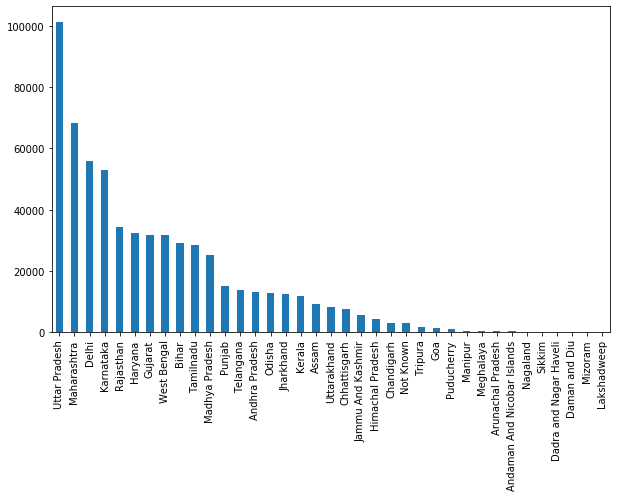

In [117]:
df['State Name'].value_counts().plot.bar()

#### Top 10 states with maximum registered users are :####

In [120]:
state.head(10)

,State Name
Uttar Pradesh,101272
Maharashtra,68331
Delhi,55810
Karnataka,53049
Rajasthan,34507
Haryana,32261
Gujarat,31920
West Bengal,31902
Bihar,29033
Tamilnadu,28366


### Number of users registered as per year :###

In [121]:
df['New Date of Registration'] = pd.to_datetime(df['Date of Registration'])

In [123]:
df.dtypes

Country                             object
State Name                          object
District Name                       object
Pin                                 object
Gender                              object
Date of Registration                object
Time of Registration                object
New Date of Registration    datetime64[ns]
dtype: object

In [124]:
df['Year'] = df['New Date of Registration'].dt.year

In [132]:
height = df['Year'].value_counts()
height

2018    315643
2019    295819
2017      7503
Name: Year, dtype: int64

<BarContainer object of 3 artists>

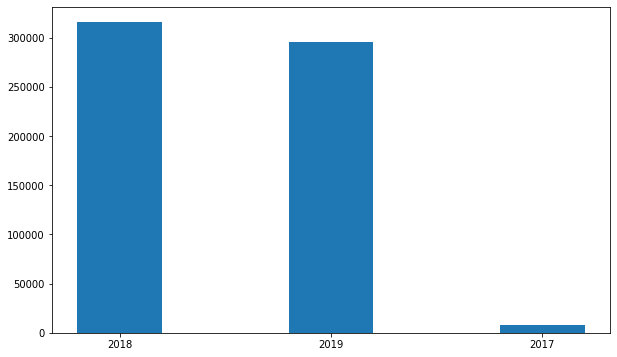

In [133]:
plt.bar(['2018','2019','2017'],height, width=0.4, align='center', data= df)

#### Maximum Users registered in year 2018 ####

In [136]:
df['Month'] = df['New Date of Registration'].dt.month

In [141]:
month = df['Month'].value_counts()
month

6     67692
7     62561
9     59077
8     56948
1     55153
3     54363
5     51620
2     47109
4     46807
10    43456
11    38687
12    35492
Name: Month, dtype: int64

<BarContainer object of 12 artists>

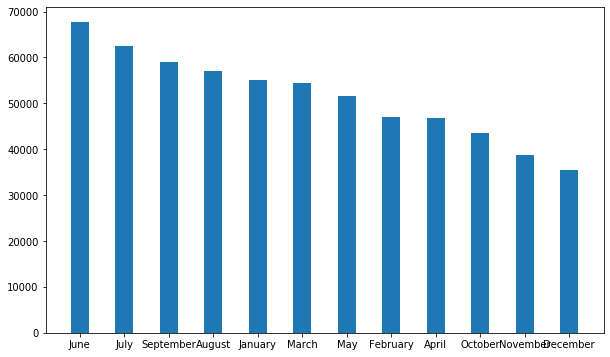

In [143]:
m = ['June','July','September','August','January','March','May','February','April','October','November','December']
plt.bar(m,month, width=0.4, align='center', data= df)

#### June , July are months given any year where most users register themselves ###

In [144]:
df.drop('Pin',axis = 1,inplace = True)

In [145]:
df.drop('Date of Registration',axis=1,inplace=True)

In [146]:
df.head()

,Country,State Name,District Name,Gender,Time of Registration,New Date of Registration,Year,Month
User Code,,,,,,,,
1,India,Delhi,South West Delhi,M,18:15:15,2017-03-11,2017,3
2,India,Uttarakhand,Dehradun,T,21:01:32,2017-03-11,2017,3
3,India,Delhi,North Delhi,M,21:55:22,2017-03-11,2017,3
4,India,Haryana,Hisar,M,22:20:35,2017-03-11,2017,3
5,India,Delhi,North Delhi,M,13:31:47,2017-04-11,2017,4


## Summary : ##

1. Maximum Number of Registered Users are Indians : 6,15,583
2. Maximum Number of Registered Users are Male : 5,47,616
3. Maximum Number of Registered Users are from Uttar Pradesh(1,01,272) followed by Maharashtra(68,331)
4. Maximum Registeration were made in the year 2018 followed by 2019
5. Maximum Registeration are made in month of June and July.